# Load raster data via WMS

In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
import warnings

import geoengine as ge

## Initialize Geo Engine

In [2]:
ge.initialize("http://localhost:3030/api")

In [3]:
session = ge.get_session()
session

Server:              http://localhost:3030/api
Session Id:          18fec623-6600-41af-b82b-24ccf47cb9f9

## Define workflow of MODIS NDVI raster

In [4]:
workflow = ge.register_workflow({
                "type": "Raster",
                "operator": {
                    "type": "GdalSource",
                    "params": {
                        "data": {
                            "type": "internal",
                            "datasetId": "36574dc3-560a-4b09-9d22-d5945f2b8093"
                        }
                    }
                }
            })
workflow

c7b7c5c8-ee11-5418-bd1f-9e5889f6e04a

## Define a query rectangle

In [5]:
time_start = datetime.strptime('2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")
time_end = datetime.strptime('2014-06-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")
bbox = ge.QueryRectangle(
    ge.BoundingBox2D(-180.0, -90.0, 180.0, 90.0),
    ge.TimeInterval(time_start, time_end),
    ge.SpatialResolution(0.5, 0.5),
)

## Query the raster workflow as single tiles

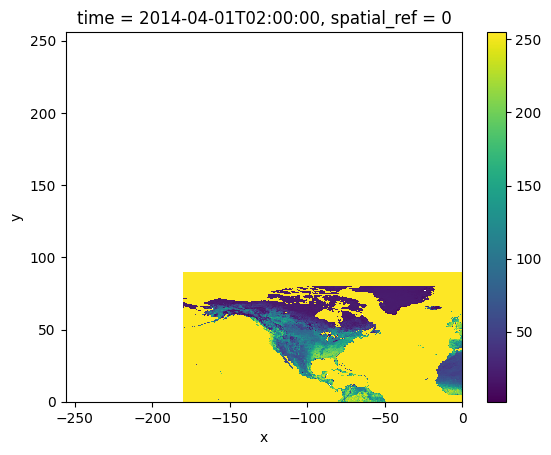

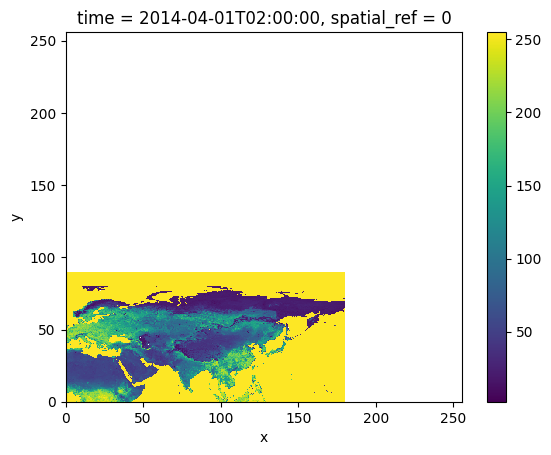

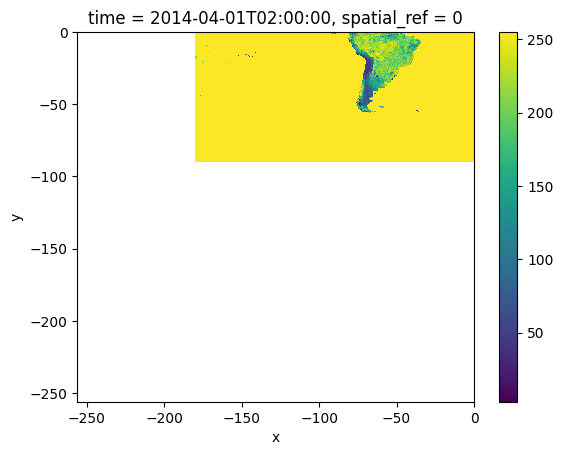

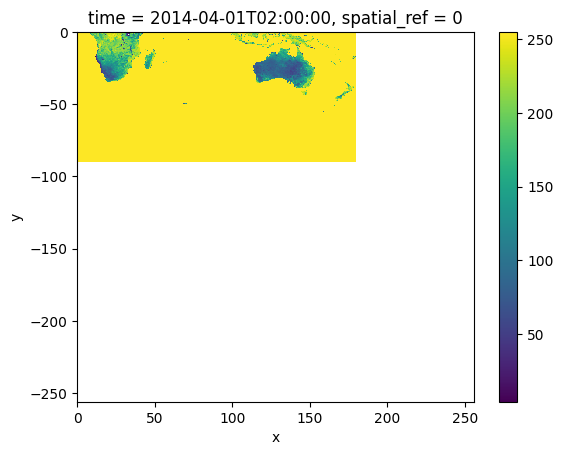

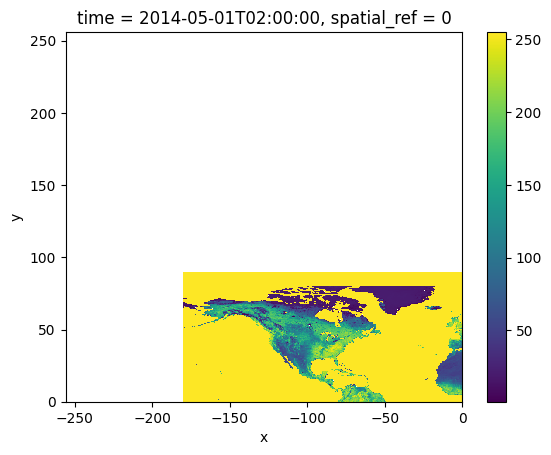

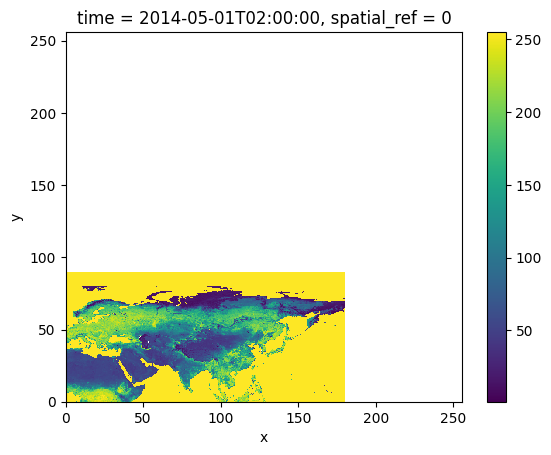

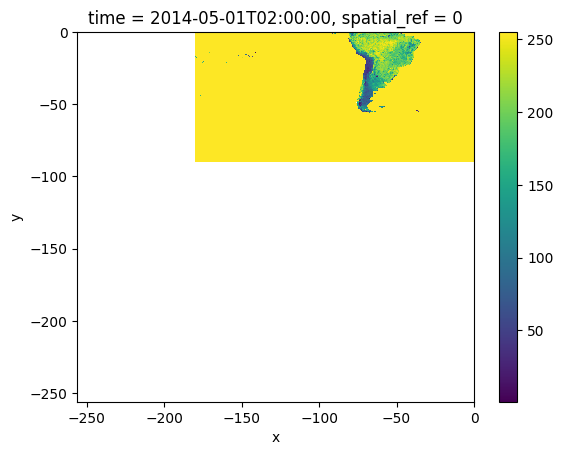

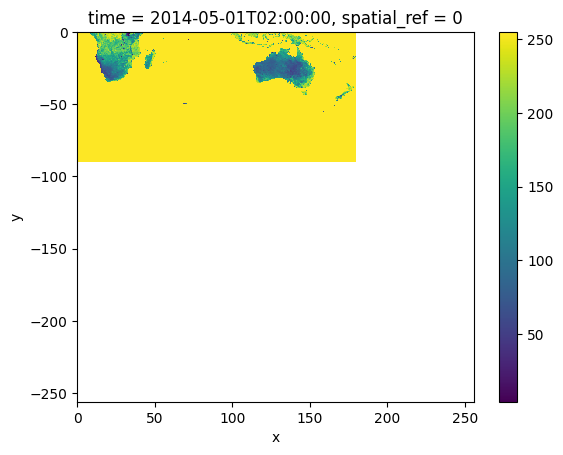

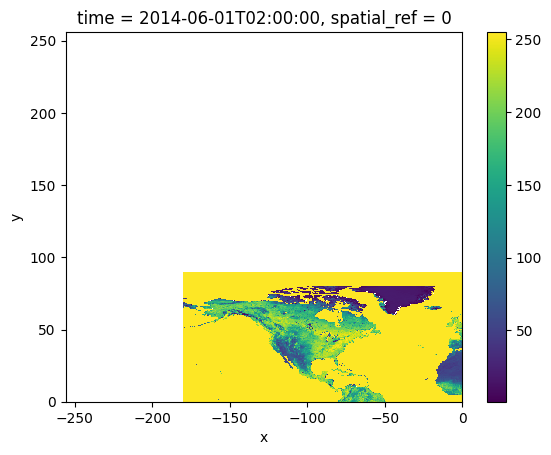

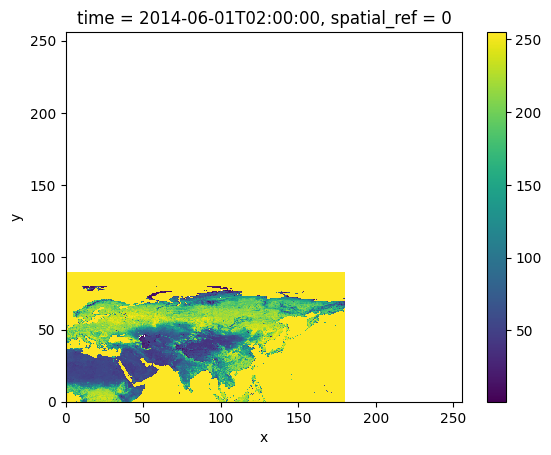

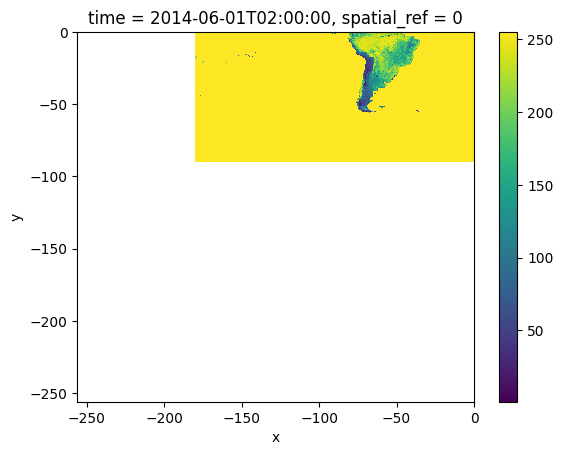

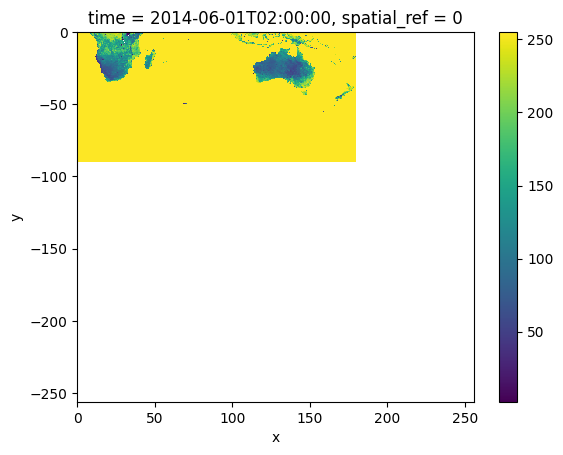

In [6]:
async for tile in workflow.raster_stream(bbox):
    tile.plot()
    plt.show()

/home/beilschmidt/git/geoengine-python/env/lib/python3.10/site-packages/rasterio/windows.py:314: RasterioDeprecationWarning: The height, width, and precision parameters are unused, deprecated, and will be removed in 2.0.0.
  warnings.warn(


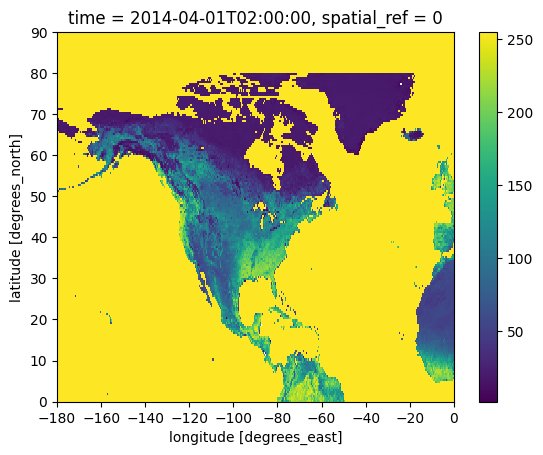

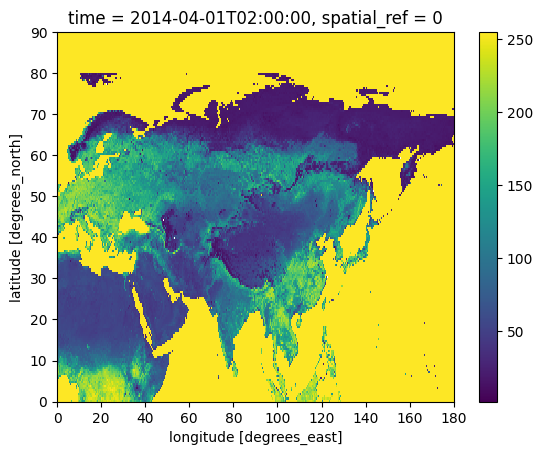

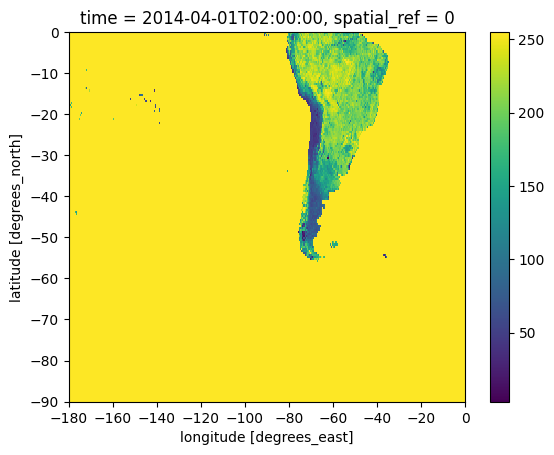

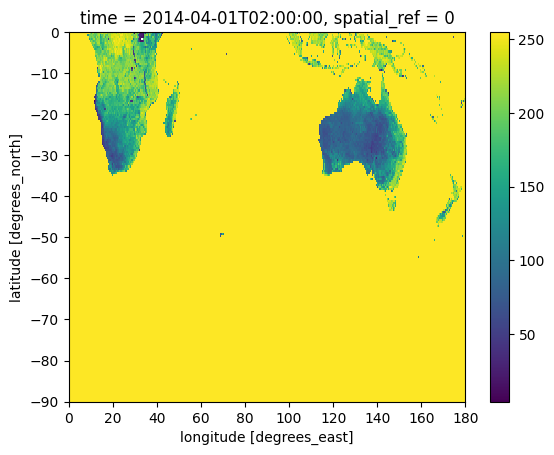

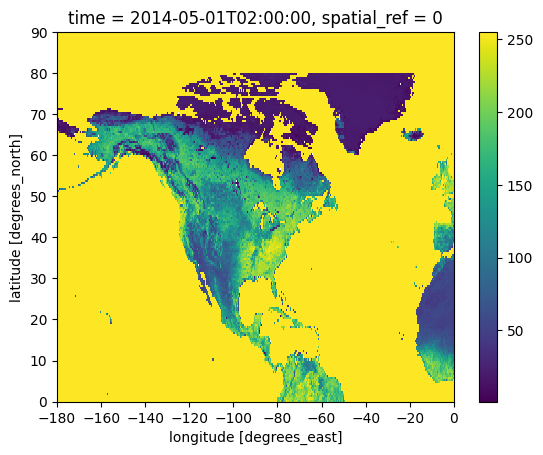

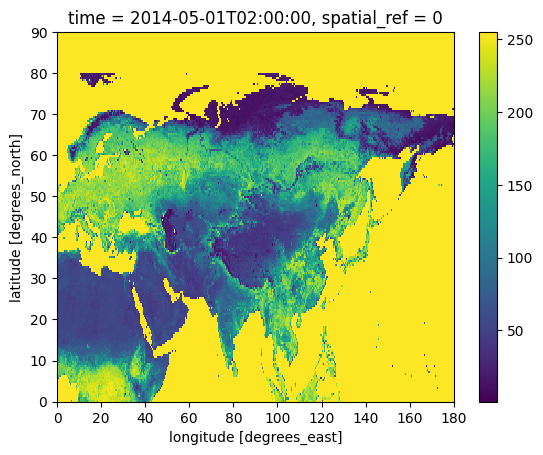

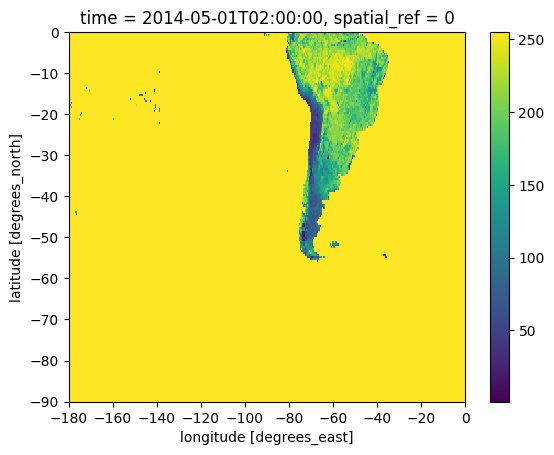

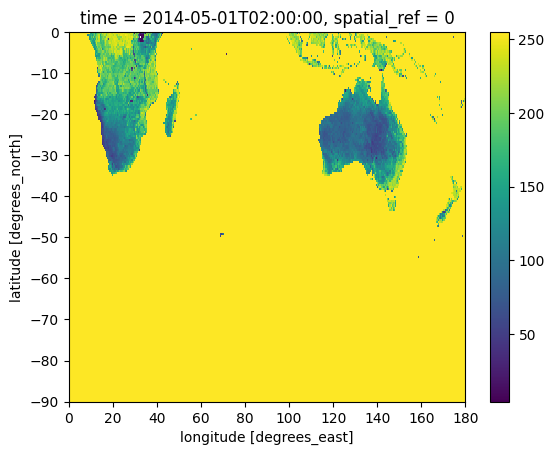

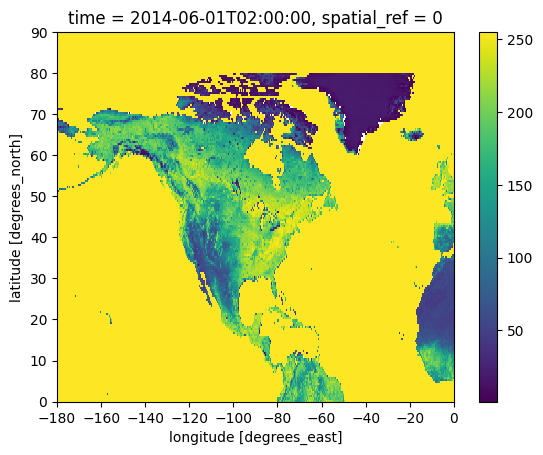

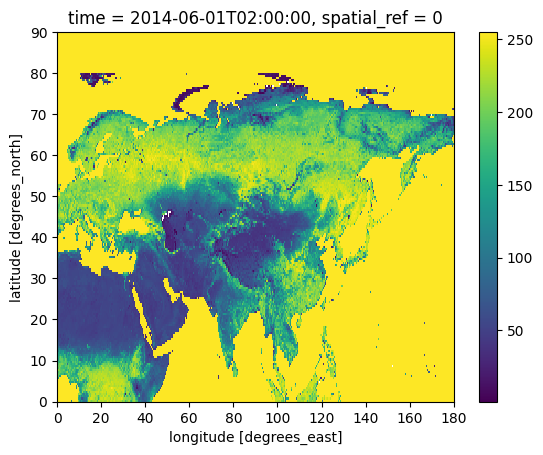

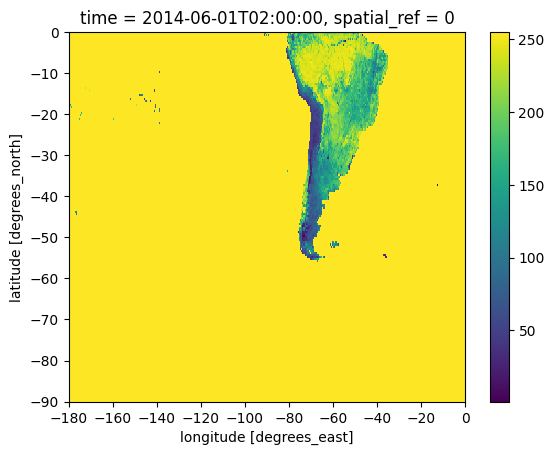

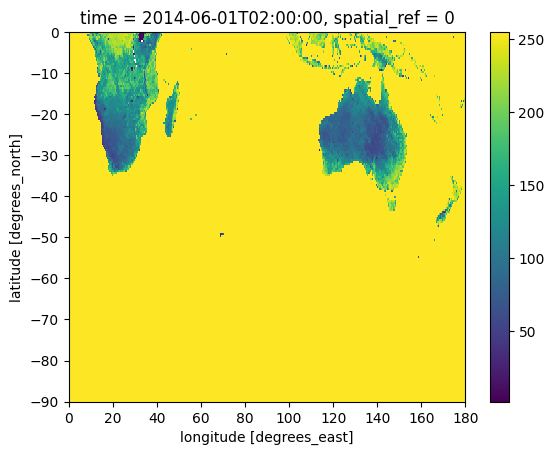

In [7]:
async for tile in workflow.raster_stream(bbox, clip_to_query_rectangle=True):
    tile.plot()
    plt.show()

# Query single tiles, merge them locally and output them as a single `DataArray`

default (no clip)


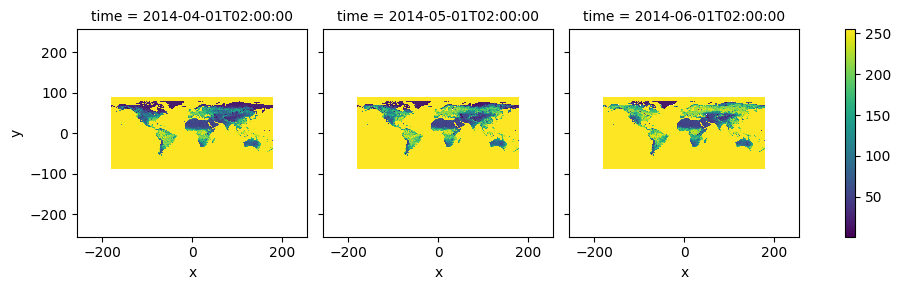

clip to query rectangle


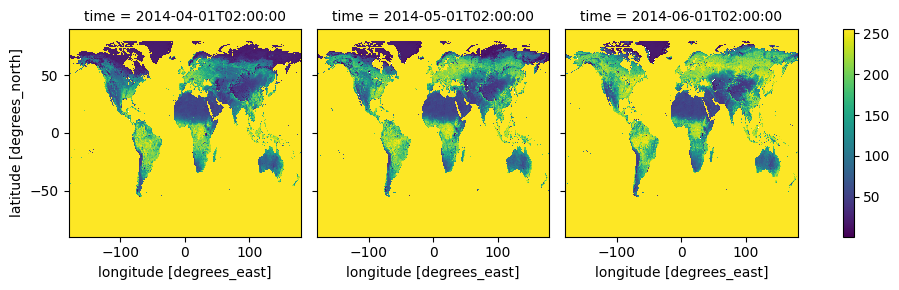

<xarray.DataArray (time: 3, y: 360, x: 720)>
array([[[255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        ...,
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.]],

       [[255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        ...,
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.]],

       [[255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        ...,
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.]]])
Coordinates:
  * x            (x) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * y            (y) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * time         (time) datetime64[ns] 2014-04-01T02:00:00 ... 2014-06-01T02:...
    spatial_ref  int64 0

In [8]:
# clippying may output a warning, but this is a false positive
warnings.simplefilter(action='ignore', category=FutureWarning)

print('default (no clip)')

array = await workflow.raster_stream_into_xarray(bbox)

array.plot(col="time");
plt.show()

print('clip to query rectangle')

array = await workflow.raster_stream_into_xarray(bbox, clip_to_query_rectangle=True)

array.plot(col="time");
plt.show()

array